In [10]:
import glob
import os
from pathlib import Path
from collections import defaultdict

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [11]:
def find_csv_files(log_dir, algos, filename) -> list[Path]:
    # Matches …/<SEED>/debug/**/finetuning_eval.csv  (depth under debug doesn't matter)
    
    csv_files = dict()
    for algo, env_name, exp_log_dir in algos:
        pattern = os.path.join(log_dir, algo, exp_log_dir, "*", "debug", "**", filename)
        files = [p for p in glob.glob(pattern, recursive=True)]
        if env_name not in csv_files:
            csv_files[env_name] = {algo: files}
        else:
            csv_files[env_name][algo] = files 
    return csv_files


log_dir = "/n/fs/rl-chongyiz/exp_logs/ogbench_logs"
algos = [
    # ("sarsa_ifql_vib_gpi_offline2offline", "cheetah_run", "20250504_sarsa_ifql_vib_gpi_offline2offline_cheetah_run_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_transition_ln=True_kl_weight=0.15_latent_dim=128"),
    # # ("sarsa_ifql_gpi_offline2offline", "cheetah_run", "20250510_sarsa_ifql_gpi_offline2offline_cheetah_run_obs_norm=normal_alpha=0.3_num_fl=8_num_fg=16_actor_freq=4_expectile=0.9_vf_time_emb=False_actor_ln=False_kl_weight=0.05_latent_dim=128_clip_fg=True"),
    # ("sarsa_ifql_offline2offline", "cheetah_run", "20250510_sarsa_ifql_offline2offline_cheetah_run_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.5_vf_time_emb=False_actor_ln=False_clip_fgs=True"),

    # ("sarsa_ifql_vib_gpi_offline2offline", "cheetah_walk", "20250504_sarsa_ifql_vib_gpi_offline2offline_cheetah_walk_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_transition_ln=True_kl_weight=0.15_latent_dim=128"),
    # ("sarsa_ifql_offline2offline", "cheetah_walk", "20250510_sarsa_ifql_offline2offline_cheetah_walk_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.5_vf_time_emb=False_actor_ln=False_clip_fgs=True"),

    ("sarsa_ifql_vib_gpi_offline2offline", "walker_flip", "20250508_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_actor_ln=False_kl_weight=0.05_latent_dim=64_clip_fg=True"),
    ("sarsa_ifql_gpi_offline2offline", "walker_flip", "20250511_sarsa_ifql_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fl=8_num_fg=16_actor_freq=4_expectile=0.9_vf_time_emb=False_actor_ln=False_kl_weight=0.05_latent_dim=64_clip_fg=True"),
    ("sarsa_ifql_offline2offline", "walker_flip", "20250511_sarsa_ifql_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.5_vf_time_emb=False_actor_ln=False_clip_fgs=True"),

    ("sarsa_ifql_vib_gpi_offline2offline", "walker_stand", "20250508_sarsa_ifql_vib_gpi_offline2offline_walker_stand_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_actor_ln=False_kl_weight=0.05_latent_dim=64_clip_fg=True"),
    ("sarsa_ifql_gpi_offline2offline", "walker_stand", "20250511_sarsa_ifql_gpi_offline2offline_walker_stand_obs_norm=normal_alpha=0.3_num_fl=8_num_fg=16_actor_freq=4_expectile=0.9_vf_time_emb=False_actor_ln=False_kl_weight=0.05_latent_dim=64_clip_fg=True"),
    ("sarsa_ifql_offline2offline", "walker_stand", "20250511_sarsa_ifql_offline2offline_walker_stand_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.5_vf_time_emb=False_actor_ln=False_clip_fgs=True"),

    ("sarsa_ifql_vib_gpi_offline2offline", "quadruped_jump", "20250504_sarsa_ifql_vib_gpi_offline2offline_quadruped_jump_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_transition_ln=True_kl_weight=0.005_latent_dim=128"),
    ("sarsa_ifql_gpi_offline2offline", "quadruped_jump", "20250511_sarsa_ifql_gpi_offline2offline_quadruped_jump_obs_norm=normal_alpha=0.3_num_fl=8_num_fg=16_actor_freq=4_expectile=0.9_vf_time_emb=False_actor_ln=False_kl_weight=0.005_latent_dim=128_clip_fg=True"),
    ("sarsa_ifql_offline2offline", "quadruped_jump", "20250510_sarsa_ifql_offline2offline_quadruped_jump_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.5_vf_time_emb=False_actor_ln=False_clip_fgs=True"),

    # ("sarsa_ifql_vib_gpi_offline2offline", "cube-single-play-singletask-task1-v0", "20250508_sarsa_ifql_vib_gpi_offline2offline_cube-single-play-singletask-task1-v0_obs_norm=normal_alpha=30.0_num_fg=16_actor_freq=4_expectile=0.95_critic_z_type=prior_vf_time_emb=False_actor_ln=False_kl_weight=0.05_latent_dim=64_clip_fg=True"),
    # ("sarsa_ifql_offline2offline", "cube-single-play-singletask-task1-v0", "20250510_sarsa_ifql_offline2offline_cube-single-play-singletask-task1-v0_obs_norm=normal_alpha=30.0_num_fg=16_actor_freq=4_expectile=0.5_vf_time_emb=False_actor_ln=False_clip_fgs=True"),

    ("sarsa_ifql_vib_gpi_offline2offline", "cube-double-play-singletask-task1-v0", "20250508_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task1-v0_obs_norm=normal_alpha=30.0_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_transition_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True"),
    ("sarsa_ifql_gpi_offline2offline", "cube-double-play-singletask-task1-v0", "20250511_sarsa_ifql_gpi_offline2offline_cube-double-play-singletask-task1-v0_obs_norm=normal_alpha=30.0_num_fl=8_num_fg=16_actor_freq=4_expectile=0.9_vf_time_emb=False_actor_ln=False_kl_weight=0.025_latent_dim=128_clip_fg=True"),
    ("sarsa_ifql_offline2offline", "cube-double-play-singletask-task1-v0", "20250511_sarsa_ifql_offline2offline_cube-double-play-singletask-task1-v0_obs_norm=normal_alpha=30.0_num_fg=16_actor_freq=4_expectile=0.5_vf_time_emb=False_actor_ln=False_clip_fgs=True"),

    ("sarsa_ifql_vib_gpi_offline2offline", "scene-play-singletask-task1-v0", "20250509_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_critic_z_type=prior_vf_time_emb=False_actor_ln=False_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("sarsa_ifql_gpi_offline2offline", "scene-play-singletask-task1-v0", "20250511_sarsa_ifql_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fl=8_num_fg=16_actor_freq=4_expectile=0.99_vf_time_emb=False_actor_ln=False_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("sarsa_ifql_offline2offline", "scene-play-singletask-task1-v0", "20250510_sarsa_ifql_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=30.0_num_fg=16_actor_freq=4_expectile=0.5_vf_time_emb=False_actor_ln=False_clip_fgs=True"),
]

env_name_maps = {
    'cheetah_run': 'cheetah run',
    'cheetah_walk': 'cheetah walk',
    'walker_flip': 'walker flip',
    'walker_stand': 'walker_stand',
    'quadruped_jump': 'quadruped jump',
    'cube-single-play-singletask-task1-v0': 'cube single task 1',
    'cube-double-play-singletask-task1-v0': 'cube double task 1',
    'scene-play-singletask-task1-v0': 'scene task 1',
}
algo_name_maps = {
    'sarsa_ifql_vib_gpi_offline2offline': 'InFOM (Ours)',
    'sarsa_ifql_gpi_offline2offline': 'InFOM + GPI',
    'sarsa_ifql_offline2offline': 'FOM + one-step PI',
}


csv_files = find_csv_files(log_dir, algos, filename="finetuning_eval.csv")

In [12]:
def load_data(csv_path, stat_name, step_name) -> np.ndarray:
    df = pd.read_csv(csv_path)
    if stat_name not in df.columns:
        raise KeyError(f"{csv_path} doesn't contain {stat_name}")
    x = df[step_name].values
    y = df[stat_name].values
    return dict(x=x, y=y)


algo_data = defaultdict(dict)
for env_name, env_csv_files in csv_files.items():
    for algo, csv_files in env_csv_files.items():
        seed_data = []
        for csv_file in csv_files:
            if 'cube-single-play-singletask-task1-v0' in csv_file or 'cube-double-play-singletask-task1-v0' in csv_file or 'scene-play-singletask-task1-v0' in csv_file:
                data = load_data(csv_file, "evaluation/episode.success", "step")
            else:
                data = load_data(csv_file, "evaluation/episode.return", "step")
            if len(seed_data) == 0:
                seed_data.append(data['x'])
            else:
                assert np.all(data['x'] == seed_data[0])
            seed_data.append(data['y'])

        seed_data = np.asarray(seed_data)
        # steps = seed_data[0]
        # data = seed_data[1:]
        
        algo_data[env_name_maps[env_name]][algo_name_maps[algo]] = seed_data
        if len(seed_data) == 1:
            print("Warning: only one random seed!")

In [13]:
print(algo_data['walker flip']['InFOM (Ours)'][1:].shape)
print(algo_data['walker flip']['InFOM + GPI'][1:].shape)
print(algo_data['walker flip']['FOM + one-step PI'][1:].shape)

(5, 11)
(2, 11)
(4, 11)


/tmp/ipykernel_300017/3334341299.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


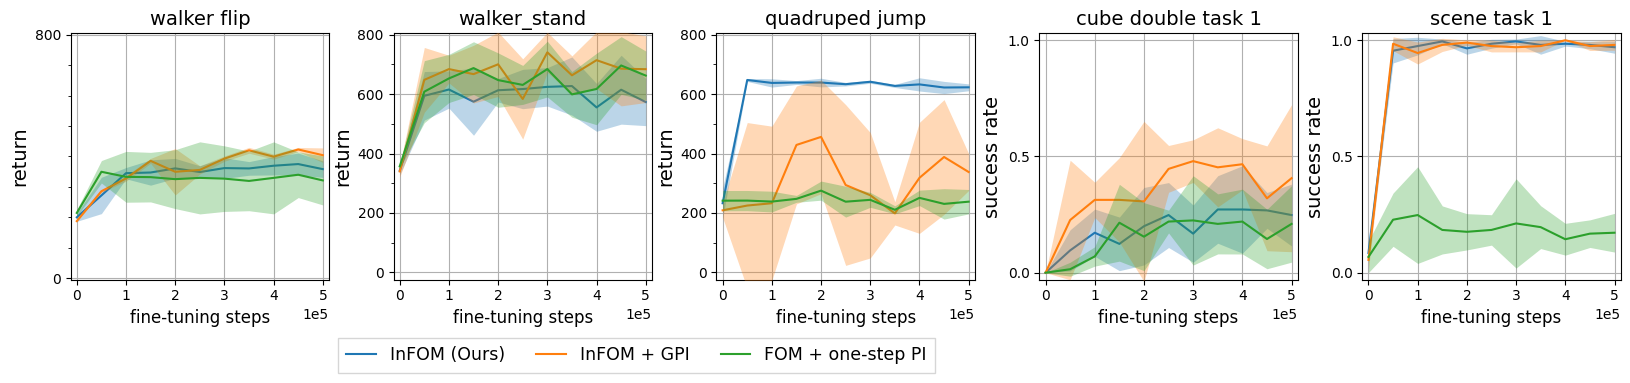

In [14]:
fig, axes = plt.subplots(1, 5, figsize=(20, 3.2), gridspec_kw=dict(wspace=0.25, hspace=0.5))

for (env_name, env_data), ax in zip(algo_data.items(), axes):
    for algo, data in env_data.items():
        x = data[0] - 1e6
        y = data[1:]
        y_mean = np.mean(y, axis=0)
        y_std = np.std(y, axis=0, ddof=1)
        
        l, = ax.plot(x, y_mean, label=algo, zorder=3)
        ax.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.3, lw=0, color=l.get_color(), zorder=3)

    if ax == axes[0]:
        ax.set_ylabel('return', fontsize=14)
        ax.set_xlim([-1.25e4, 5e5 + 1.25e4])
        ax.set_ylim([-5, 800 + 5])
        ax.set_yticks([0, 800])
        ax.yaxis.set_minor_locator(MultipleLocator(200))
        ax.yaxis.set_minor_locator(MultipleLocator(100))
        
        ax.legend(bbox_to_anchor=(1.0, -0.2),
            loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
            shadow=False, fontsize=12.5, borderpad=0.5, handlelength=1.7, ncol=3)
    if ax == axes[1] or ax == axes[2]:
        ax.set_ylabel('return', fontsize=14)
        ax.set_xlim([-1.25e4, 5e5 + 1.25e4])
        ax.set_ylim([-25, 800 + 5])
        # ax.set_yticks([0, 800])
        ax.yaxis.set_minor_locator(MultipleLocator(200))
        ax.yaxis.set_minor_locator(MultipleLocator(100))
    elif ax == axes[3] or ax == axes[4]:
        ax.set_ylabel('success rate', fontsize=14)
        ax.set_xlim([-1.25e4, 5e5 + 1.25e4])
        ax.set_ylim([-0.03, 1.0 + 0.03])
        ax.set_yticks([0.0, 0.5, 1.0])
        ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    
    ax.set_title(env_name, fontsize=14)
    ax.set_xlabel('fine-tuning steps', fontsize=12)
    # ax.yaxis.set_major_locator(MultipleLocator(200))
    ax.yaxis.set_minor_locator(MultipleLocator(100))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))  
    
    ax.grid(zorder=3)

fig.tight_layout()
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/policy_extraction_ablation_lc.pdf"
fig.savefig(filepath, dpi=150, bbox_inches="tight")
plt.show()


env = walker flip, InFOM (Ours): mean = 367.6713, std = 21.1020
env = walker flip, InFOM + GPI: mean = 408.9046, std = 2.9817
env = walker flip, FOM + one-step PI: mean = 330.3095, std = 89.9351
env = walker_stand, InFOM (Ours): mean = 581.1600, std = 72.1396
env = walker_stand, InFOM + GPI: mean = 694.7294, std = 104.0101
env = walker_stand, FOM + one-step PI: mean = 658.7948, std = 95.1048
env = quadruped jump, InFOM (Ours): mean = 626.0349, std = 6.8158
env = quadruped jump, InFOM + GPI: mean = 347.9947, std = 134.2345
env = quadruped jump, FOM + one-step PI: mean = 239.5544, std = 33.5380
env = cube double task 1, InFOM (Ours): mean = 0.2627, std = 0.0888
env = cube double task 1, InFOM + GPI: mean = 0.3978, std = 0.2066
env = cube double task 1, FOM + one-step PI: mean = 0.1917, std = 0.1346
env = scene task 1, InFOM (Ours): mean = 0.9783, std = 0.0100
env = scene task 1, InFOM + GPI: mean = 0.9850, std = 0.0114
env = scene task 1, FOM + one-step PI: mean = 0.1613, std = 0.0591


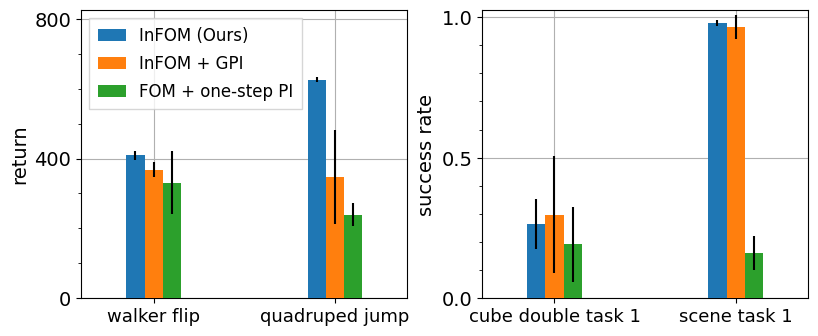

In [24]:
for env_name, env_data in algo_data.items():
    for algo, data in env_data.items():
        # x = data[0] - 1e6
        y = data[1:, -3:].mean(axis=-1)
        y_mean = np.mean(y, axis=0)
        y_std = np.std(y, axis=0, ddof=1)
        
        print(f"env = {env_name}, {algo}: mean = {y_mean:.4f}, std = {y_std:.4f}")


tasks = ['walker flip', 'quadruped jump', 'cube double task 1', 'scene task 1']

infom_mean = np.array([408.9046, 626.0349, 0.2627, 0.9783])
infom_std = np.array([12.9817, 6.8158, 0.0888, 0.0100])
gpi_fom_mean = np.array([367.6713, 347.9947, 0.2978, 0.9650])
gpi_fom_std = np.array([21.1020, 134.2345, 0.2066, 0.0440])
onestep_pi_mean = np.array([330.3095, 239.5544, 0.1917, 0.1613])
onestep_pi_std = np.array([89.9351, 33.5380, 0.1346, 0.0591])

# fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
fig, axes = plt.subplots(1, 2, figsize=(8, 3.2))

x = np.arange(2)
width = 0.05

ax = axes[0]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.0 * width, infom_mean[:2], yerr=infom_std[:2], width=width, label='InFOM (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.0 * width, gpi_fom_mean[:2], yerr=gpi_fom_std[:2], width=width, label='InFOM + GPI', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.0 * width, onestep_pi_mean[:2], yerr=onestep_pi_std[:2], width=width, label='FOM + one-step PI', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len(tasks[:2]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 825])
ax.legend(fontsize=12, labelspacing=0.6, columnspacing=1.8075,
          borderpad=0.5, handlelength=1.7, ncol=1, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, tasks[:2], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.0 * width, infom_mean[2:], yerr=infom_std[2:], width=width, label='InFOM (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.0 * width, gpi_fom_mean[2:], yerr=gpi_fom_std[2:], width=width, label='InFOM + GPI', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.0 * width, onestep_pi_mean[2:], yerr=onestep_pi_std[2:], width=width, label='FOM + one-step PI', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len(tasks[2:]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 1.025])
ax.set_xticks(x * multiplier, tasks[2:], fontsize=13)
ax.set_yticks([0.0, 0.5, 1.0])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/policy_extraction_ablation_lc.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()
